In [7]:
# 한글 폰트 관련
# 1. 나눔 폰트 설치
!apt-get -y install fonts-nanum

# 2. 런타임 재시작 없이 폰트 강제 등록
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 3. 폰트 경로 직접 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path).get_name()

# 4. matplotlib 기본 설정에 강제로 반영
mpl.rcParams['font.family'] = nanum_font
mpl.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,794 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


import sklearn
import xgboost
from xgboost import XGBRegressor


from sklearn.model_selection import KFold

import random as rn

RANDOM_SEED = 2025
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)



from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dacon_2025_Power_usage_prediction_AI_github/2025dacon_powerU_github

/content/drive/MyDrive/dacon_2025_Power_usage_prediction_AI_github/2025dacon_powerU_github


In [ ]:
!git config --global user.name "SonHyesang0914"
!git config --global user.email "hyesang0914@gmail.com"

In [8]:
train_path = "/content/drive/MyDrive/dacon_2025_Power_usage_prediction_AI/dacon_data/train.csv"
test_path = "/content/drive/MyDrive/dacon_2025_Power_usage_prediction_AI/dacon_data/test.csv"
building_info_path = "/content/drive/MyDrive/dacon_2025_Power_usage_prediction_AI/dacon_data/building_info.csv"

In [11]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
building_info = pd.read_csv(building_info_path)

In [12]:
train

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.00,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.00,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.00,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.00,3602.25
...,...,...,...,...,...,...,...,...,...,...
203995,100_20240824 19,100,20240824 19,29.1,0.0,4.4,76.0,0.4,0.18,3276.00
203996,100_20240824 20,100,20240824 20,28.6,0.0,3.7,74.0,0.0,0.00,3197.52
203997,100_20240824 21,100,20240824 21,28.3,0.0,2.9,74.0,0.0,0.00,3006.60
203998,100_20240824 22,100,20240824 22,28.0,0.0,1.7,76.0,0.0,0.00,2649.72


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [14]:
train.describe()

,건물번호,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000
mean,50.500000,26.098130,0.304185,1.967977,75.206706,0.277459,0.702752,3329.575857
std,28.866141,4.052888,2.052947,1.316102,16.378490,0.396476,1.017394,3689.102792
min,1.000000,8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.500000,0.000000,1.000000,64.000000,0.000000,0.000000,1176.120000
50%,50.500000,26.300000,0.000000,1.800000,78.000000,0.000000,0.050000,1935.720000
75%,75.250000,28.800000,0.000000,2.700000,88.000000,0.600000,1.230000,3726.765000
max,100.000000,38.700000,100.900000,15.200000,100.000000,1.000000,3.950000,27155.940000


In [16]:
test

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,1_20240825 00,1,20240825 00,26.5,0.0,0.7,80.0
1,1_20240825 01,1,20240825 01,26.1,0.0,0.0,80.0
2,1_20240825 02,1,20240825 02,25.9,0.0,0.3,83.0
3,1_20240825 03,1,20240825 03,25.7,0.0,1.1,83.0
4,1_20240825 04,1,20240825 04,25.5,0.0,1.0,86.0
...,...,...,...,...,...,...,...
16795,100_20240831 19,100,20240831 19,27.1,0.0,2.7,68.0
16796,100_20240831 20,100,20240831 20,26.5,0.0,2.9,73.0
16797,100_20240831 21,100,20240831 21,26.3,0.0,3.5,73.0
16798,100_20240831 22,100,20240831 22,26.0,0.0,3.4,68.0


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(°C)         16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [19]:
test.describe()

,건물번호,기온(°C),강수량(mm),풍속(m/s),습도(%)
count,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000
mean,50.500000,27.304827,0.039411,1.925756,73.730833
std,28.866929,2.945470,0.686065,1.203548,13.119807
min,1.000000,18.300000,0.000000,0.000000,0.000000
25%,25.750000,25.200000,0.000000,1.000000,64.000000
50%,50.500000,27.000000,0.000000,1.800000,75.000000
75%,75.250000,29.600000,0.000000,2.700000,84.000000
max,100.000000,35.400000,28.000000,7.700000,100.000000


In [21]:
building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250
...,...,...,...,...,...,...,...
95,96,건물기타,3260213.41,1956128.00,-,-,-
96,97,건물기타,42370.93,3975.52,81.38,-,-
97,98,호텔,99102.62,22097.00,-,-,-
98,99,상용,329867.95,13442.35,171.6,-,-


In [23]:
building_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [24]:
building_info.describe()

,건물번호,연면적(m2),냉방면적(m2)
count,100.000000,1.000000e+02,1.000000e+02
mean,50.500000,1.857529e+05,1.091272e+05
std,29.011492,3.390836e+05,2.077200e+05
min,1.000000,1.003542e+04,3.378400e+02
25%,25.750000,5.698032e+04,2.595468e+04
50%,50.500000,1.049387e+05,6.433699e+04
75%,75.250000,2.027810e+05,1.243468e+05
max,100.000000,3.260213e+06,1.956128e+06


In [25]:
#한글로 된 행 영어로 변환
train = train.rename(columns={
    '건물번호': 'building_num',
    '일시': 'date_time',
    '기온(°C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

test = test.rename(columns={
    '건물번호': 'building_num',
    '일시': 'date_time',
    '기온(°C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)

building_info = building_info.rename(columns={
    '건물번호': 'building_num',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

#한글로 된 건물 유형 영어로 변환
translation_dict = {
    '건물기타': 'Other_building',
    '공공': 'Public',
    '학교': 'University',
    '백화점': 'Department_store',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Laboratory',
    'IDC(전화국)': 'IDC',
    '호텔': 'Hotel'
}

building_info['building_type'] = building_info['building_type'].replace(translation_dict)

#태양광 기술이나 ess(pcs 포함)기술 유무 행 추가 있으면 1 없으면 0
#하는 이유? 단순 존재 여부 판단 편리 -> 시각화나 조건달 때 편리
#그리고 트리모델에서 더 잘 활용하기 위해 0과 1로 이분화
building_info['solar_power_include'] = np.where(building_info.solar_power_capacity !='-',1,0)
building_info['ess_include'] = np.where(building_info.ess_capacity !='-',1,0)

# ESS, 태양광, PCS 용량이 '-'이면 0으로 바꾸고, 나머지는 float로 변환
cols_to_convert = ['solar_power_capacity', 'ess_capacity', 'pcs_capacity']

for col in cols_to_convert:
    building_info[col] = building_info[col].replace('-', 0).astype(float)


train = pd.merge(train, building_info, on='building_num', how='left')
test = pd.merge(test, building_info, on='building_num', how='left')

In [26]:
train['date_time'] = pd.to_datetime(train['date_time'], format='%Y%m%d %H')

# date time feature 생성
train['hour'] = train['date_time'].dt.hour
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['day_of_week'] = train['date_time'].dt.dayofweek #요일


test['date_time'] = pd.to_datetime(test['date_time'], format='%Y%m%d %H')

# date time feature 생성
test['hour'] = test['date_time'].dt.hour
test['day'] = test['date_time'].dt.day
test['month'] = test['date_time'].dt.month
test['day_of_week'] = test['date_time'].dt.dayofweek #요일

In [27]:
train

,building_num,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,solar_power_include,ess_include,hour,day,month,day_of_week
0,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,Hotel,82912.71,77586.0,0.0,0.0,0.0,0,0,0,1,6,5
1,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,Hotel,82912.71,77586.0,0.0,0.0,0.0,0,0,1,1,6,5
2,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,Hotel,82912.71,77586.0,0.0,0.0,0.0,0,0,2,1,6,5
3,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,Hotel,82912.71,77586.0,0.0,0.0,0.0,0,0,3,1,6,5
4,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,Hotel,82912.71,77586.0,0.0,0.0,0.0,0,0,4,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2024-08-24 19:00:00,29.1,0.0,4.4,76.0,0.4,0.18,3276.00,Hotel,162070.24,152943.0,0.0,0.0,0.0,0,0,19,24,8,5
203996,100,2024-08-24 20:00:00,28.6,0.0,3.7,74.0,0.0,0.00,3197.52,Hotel,162070.24,152943.0,0.0,0.0,0.0,0,0,20,24,8,5
203997,100,2024-08-24 21:00:00,28.3,0.0,2.9,74.0,0.0,0.00,3006.60,Hotel,162070.24,152943.0,0.0,0.0,0.0,0,0,21,24,8,5
203998,100,2024-08-24 22:00:00,28.0,0.0,1.7,76.0,0.0,0.00,2649.72,Hotel,162070.24,152943.0,0.0,0.0,0.0,0,0,22,24,8,5


In [28]:
building_info["building_type"].value_counts()

,count
building_type,
Department_store,16
Hotel,10
Commercial,10
University,10
Other_building,10
Hospital,9
Apartment,9
Laboratory,9
IDC,9


In [29]:
train["building_num"].value_counts()

,count
building_num,
1,2040
2,2040
3,2040
4,2040
5,2040
...,...
96,2040
97,2040
98,2040


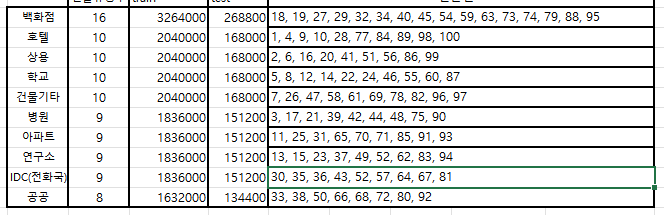


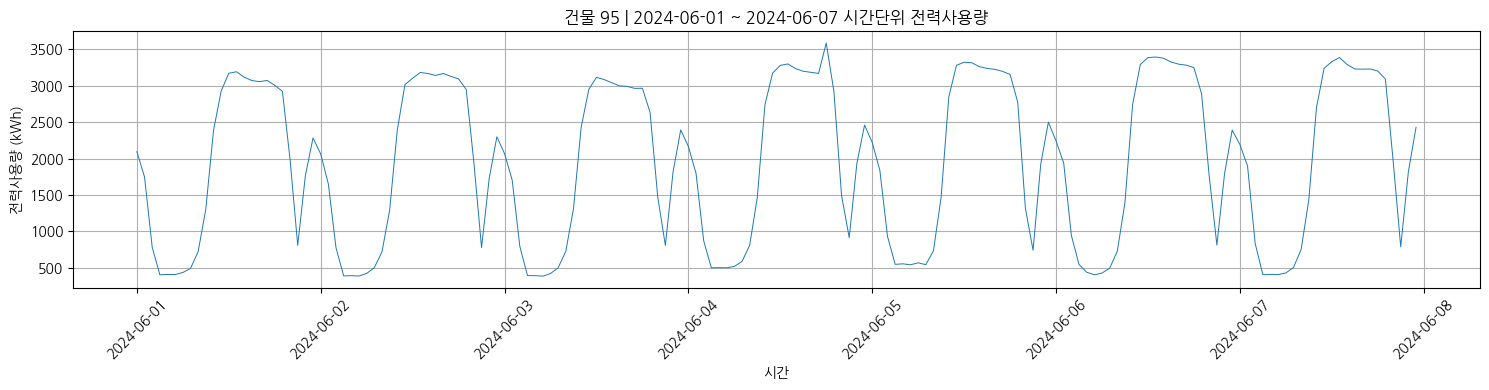

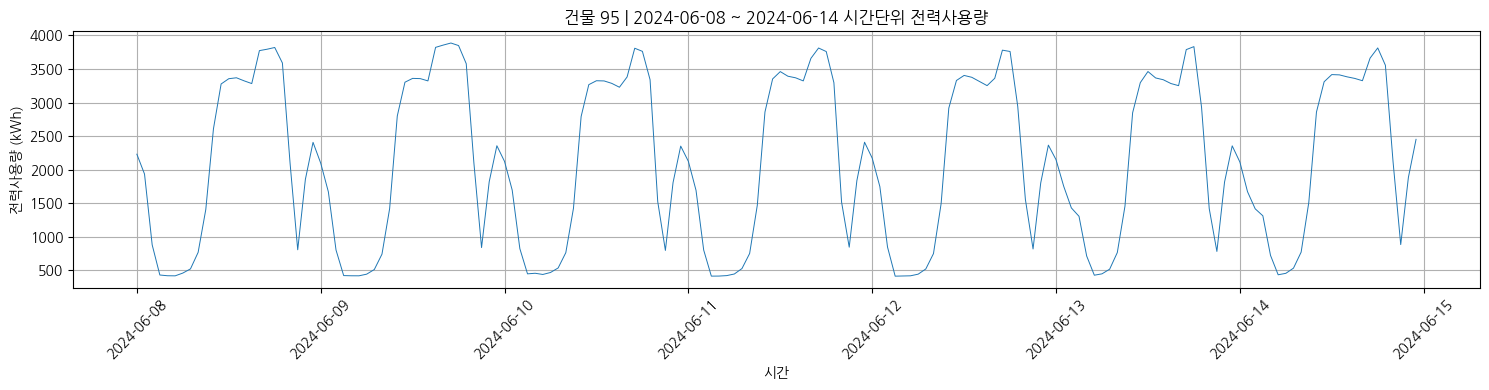

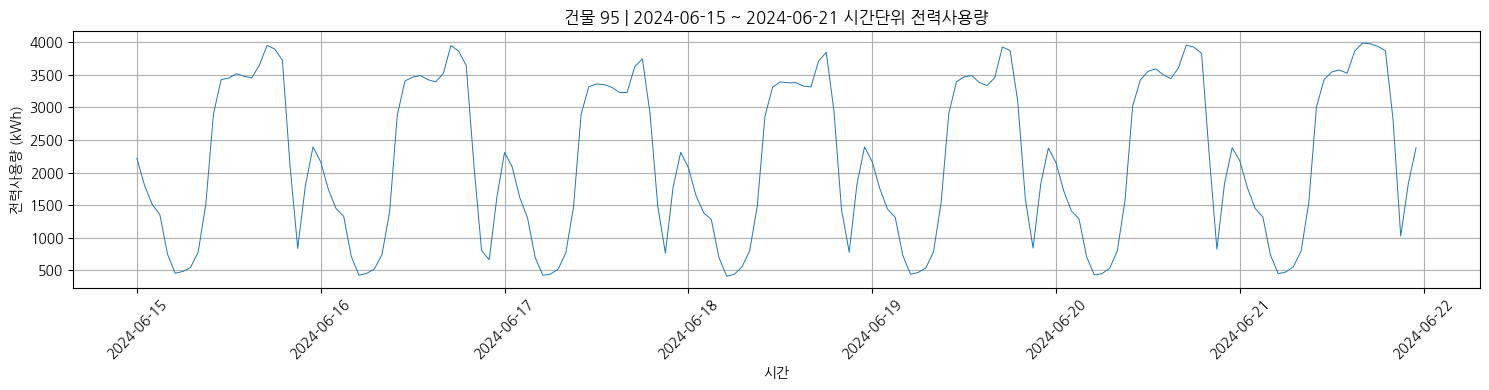

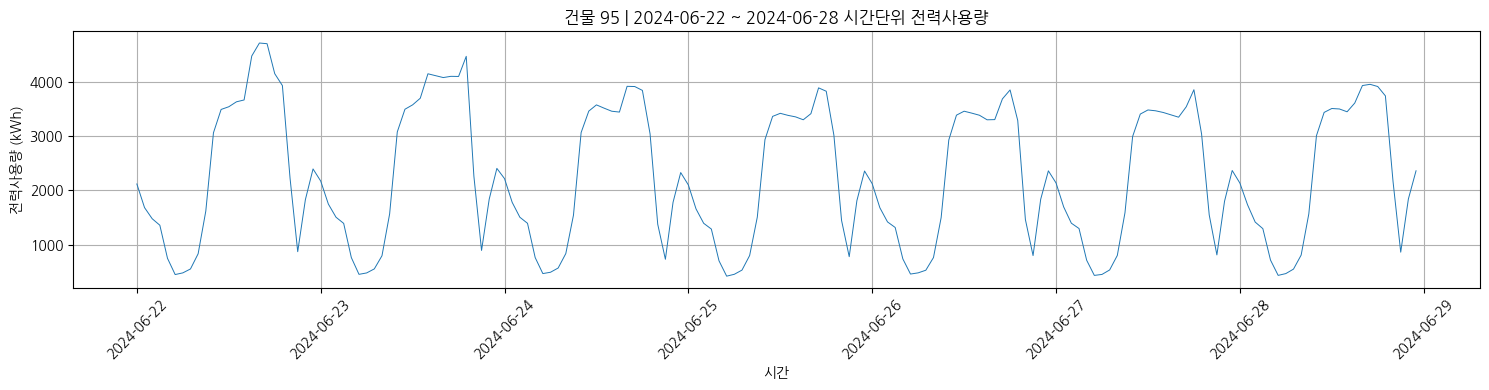

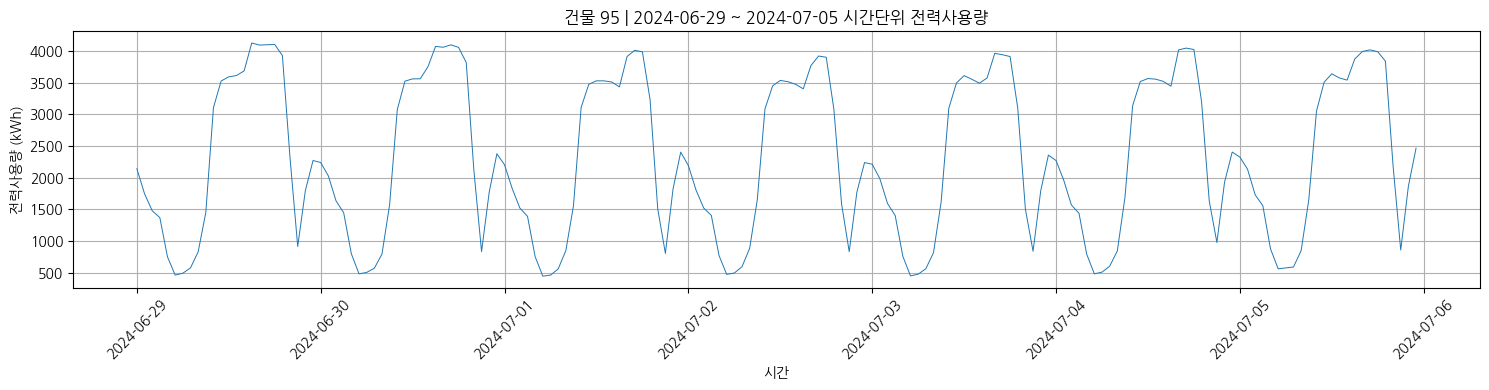

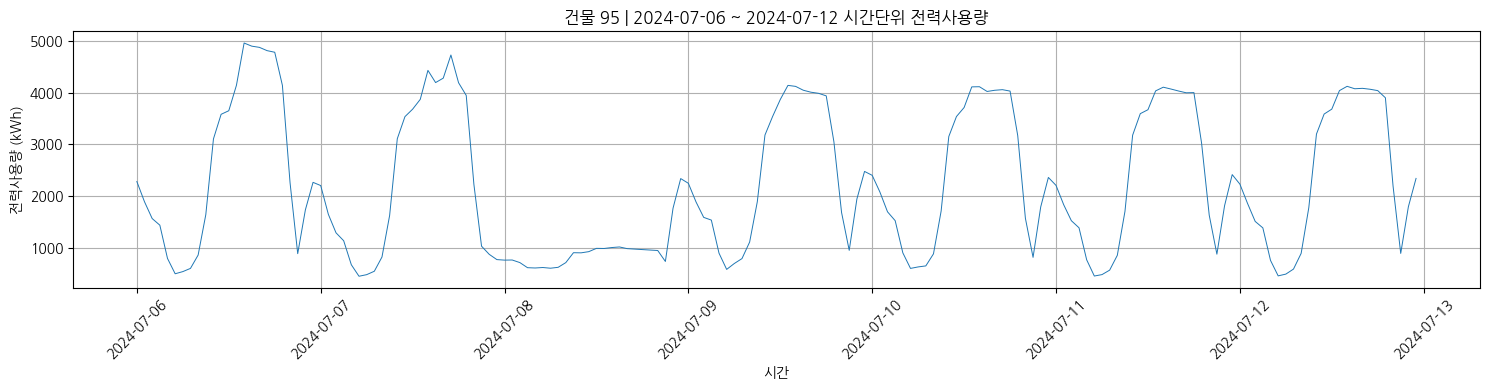

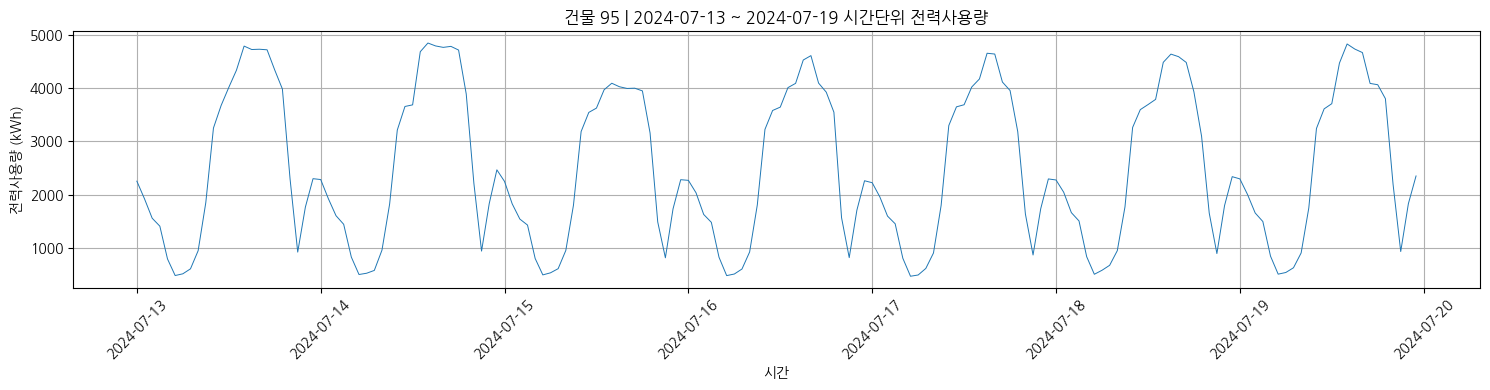

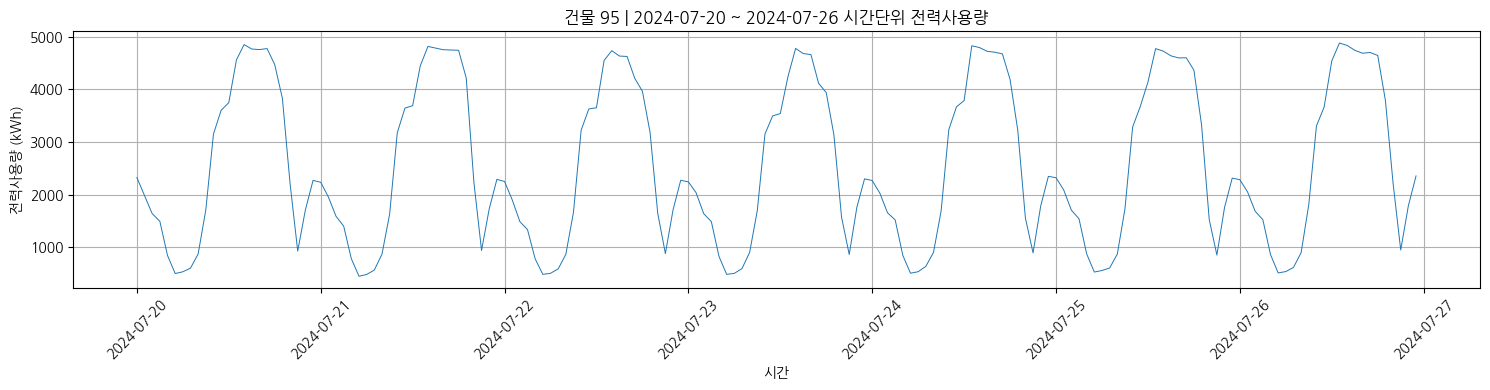

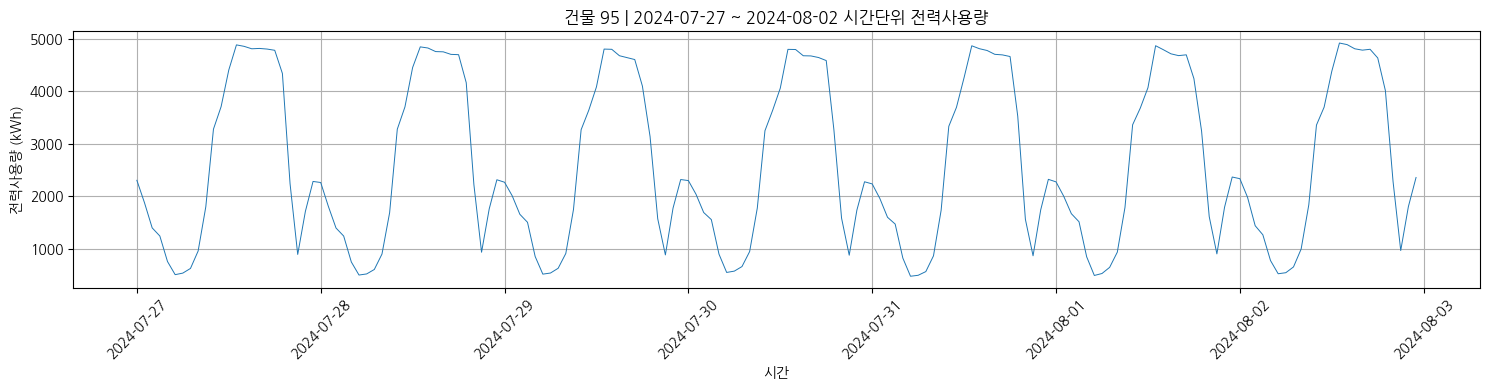

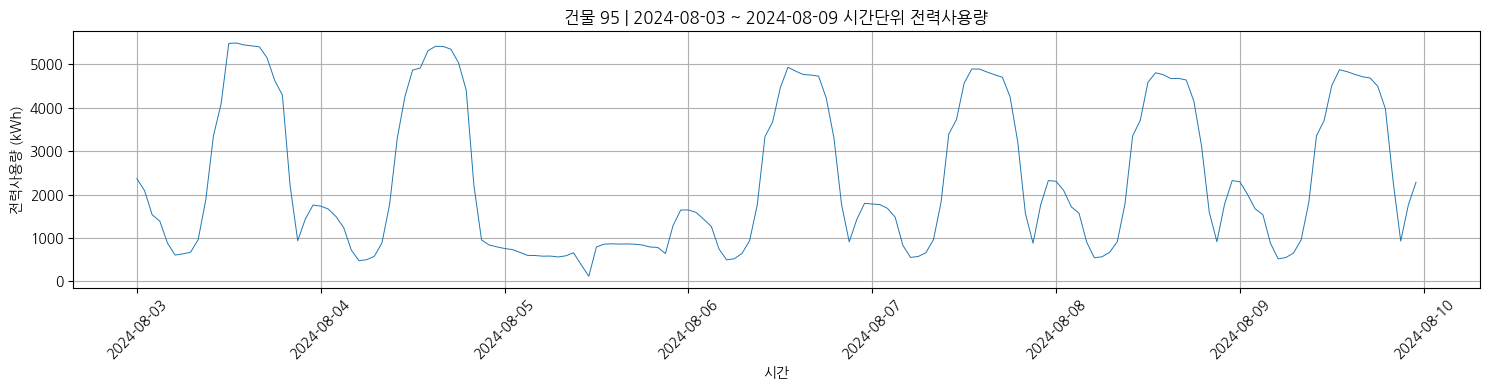

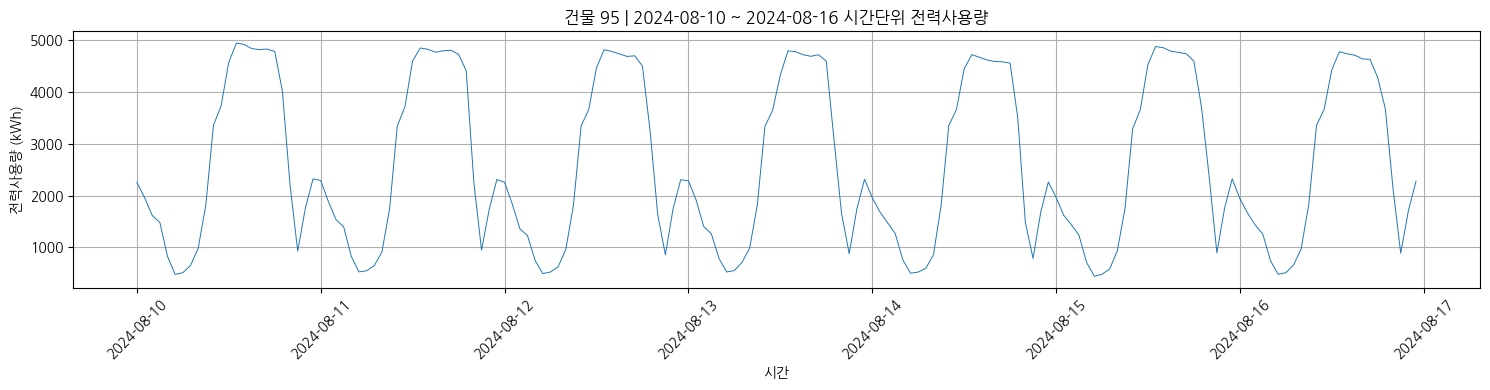

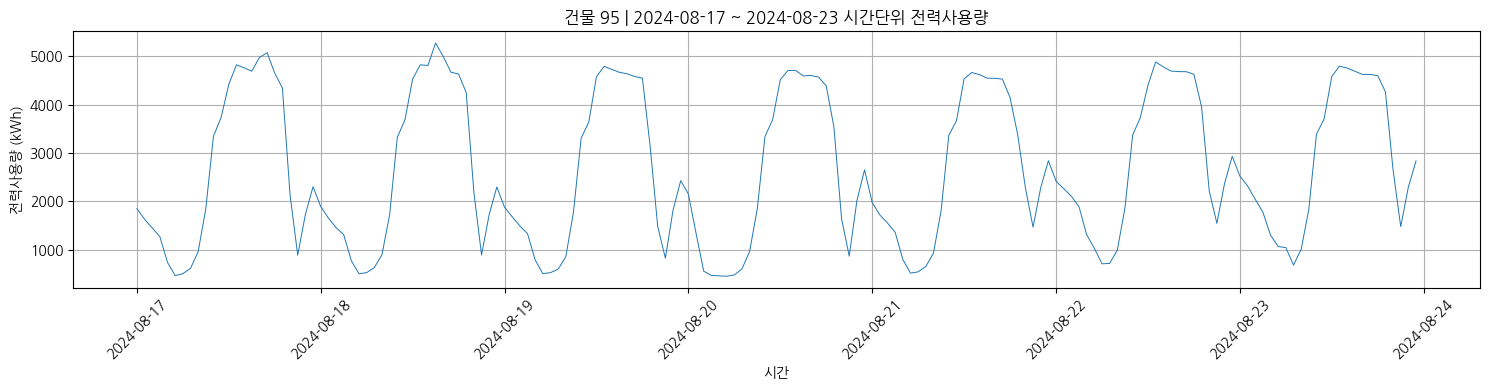

In [30]:
from datetime import timedelta

# 시작 날짜와 종료 날짜
start = train['date_time'].min().date()
end = train['date_time'].max().date()

b_id = 1

temp = train[train['building_num'] == b_id].copy()
temp = temp.sort_values('date_time')

# 주간 단위 반복
current = start
while current + timedelta(days=7) <= end:
    s = pd.to_datetime(current)
    e = pd.to_datetime(current + timedelta(days=7))

    week_temp = temp[(temp['date_time'] >= s) & (temp['date_time'] < e)]

    plt.figure(figsize=(15, 4))
    sns.lineplot(data=week_temp, x='date_time', y='power_consumption', linewidth=0.7)
    plt.title(f"건물 {b_id} | {s.date()} ~ {(e - timedelta(days=1)).date()} 시간단위 전력사용량")
    plt.xlabel("시간")
    plt.ylabel("전력사용량 (kWh)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    current += timedelta(days=7)


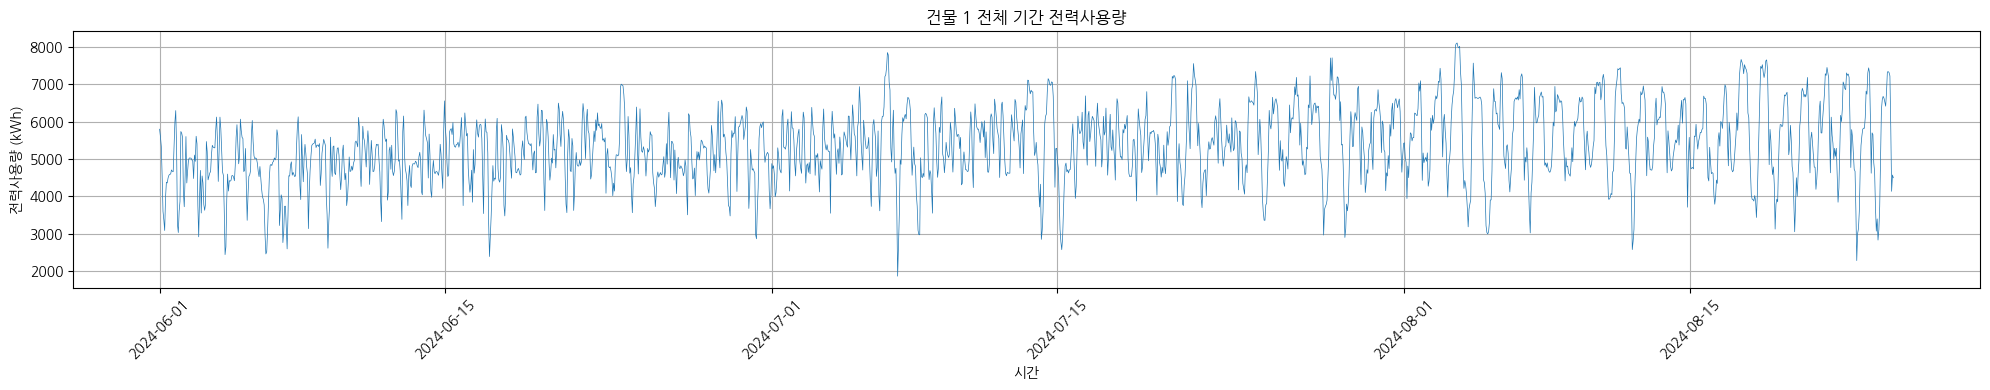

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

b_id = 1

temp = train[train['building_num'] == b_id].copy()

plt.figure(figsize=(20, 4))
sns.lineplot(data=temp, x='date_time', y='power_consumption', linewidth=0.5)
plt.title(f"건물 {b_id} 전체 기간 전력사용량")
plt.xlabel("시간")
plt.ylabel("전력사용량 (kWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
